In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

# SOCIAL MEDIA (Sentiment140)

In [16]:
sentiment140_path = "../data/sentiment140_dataset.csv"

df_social = pd.read_csv(sentiment140_path, encoding='latin-1', header=None)
df_social.head(10)

df_social.dropna(inplace=True) 

In [17]:
df_social.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df_social.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [18]:
df_social.shape

(1600000, 6)

In [19]:
df_social.info

<bound method DataFrame.info of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [20]:
df_social.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [21]:
df_social['target'].unique()

array([0, 4])

target
0    800000
4    800000
Name: count, dtype: int64


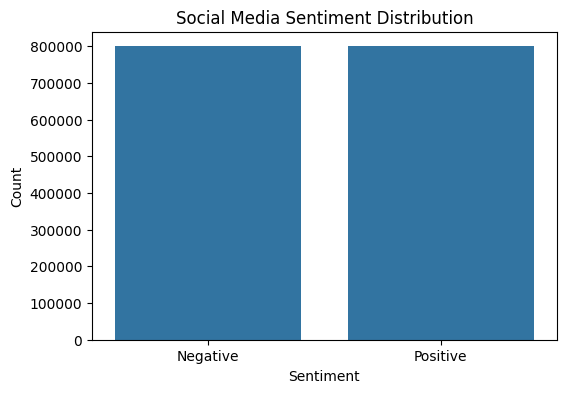

In [22]:
# Class Distribution
print(df_social['target'].value_counts())

label_map = {0: "Negative",  4: "Positive"}
df_social['sentiment_label'] = df_social['target'].map(label_map)

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df_social)
plt.title("Social Media Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [24]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from scripts.data_preprocessing import preprocess_social_dataset

In [25]:
df_social_clean = preprocess_social_dataset(sentiment140_path)
df_social_clean

Loading data from: ../data/sentiment140_dataset.csv


,sentiment_label,text,clean_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david carr...
1,Negative,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,Negative,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
...,...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt interviews
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...


In [27]:
df_social_clean.isnull().sum()

sentiment_label    0
text               0
clean_text         0
dtype: int64

In [28]:
# Save cleaned social media dataset
df_social_clean.to_csv("../data/social_clean.csv", index=False)

# NEWS (News Sentiment Analysis)

In [12]:
news_path = "../data/news_sentiment_analysis.csv"

df_news = pd.read_csv(news_path)
df_news.head(10)

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business
5,4-traders,NaN,Gabelli asks Paramount for details on National...,(marketscreener.com) Billionaire investor Mari...,https://www.marketscreener.com/business-leader...,2024-07-12T22:23:28+00:00,positive,Business
6,4-traders,NaN,QWI INVESTMENTS : QWI) &ndash; ANNOUNCEMENT RE...,"(marketscreener.com) July 12, 2024 5:08 pm QWI...",https://www.marketscreener.com/quote/stock/QWI...,2024-07-12T22:16:07+00:00,positive,Business
7,4-traders,NaN,Rome Resources Announces Shareholder Approval ...,(marketscreener.com) Rome Resources Ltd. is pl...,https://www.marketscreener.com/quote/stock/ROM...,2024-07-12T22:15:07+00:00,positive,Business
8,The Chronicle,peter,Fawcett accused of fronting scheme for hostile...,Business Reporter A POTENTIALLY bruising fight...,https://www.chronicle.co.zw/fawcett-accused-of...,2024-07-12T22:05:43+00:00,positive,Business
9,International Business Times Au,NaN,What Makes Spynn Publicity The Top Choice For ...,With creative strategies and deep industry kno...,https://www.ibtimes.com.au/what-makes-spynn-pu...,2024-07-12T22:04:35+00:00,positive,Business


In [13]:
df_news.shape

(3500, 8)

In [14]:
df_news.isnull().sum()

Source            0
Author          988
Title             0
Description       0
URL               0
Published At      0
Sentiment         0
Type              0
dtype: int64

In [15]:
df_news['Sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [16]:
df_news['Sentiment'].value_counts(normalize=True) * 100

Sentiment
positive    60.971429
neutral     22.542857
negative    16.485714
Name: proportion, dtype: float64